In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

### 1. 

In [2]:
cafe = pd.read_csv('samples/cafe_2year.csv')
cafe.head()

,기준월,카페수
0,201710,79296
1,201711,80738
2,201712,76923
3,201801,77942
4,201802,84967


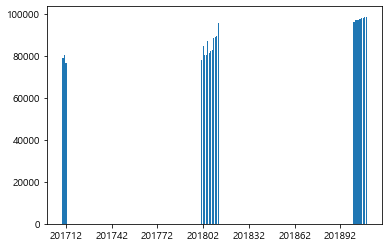

In [3]:
## 1. Matpoltlib을 이용하여 월별 카페의 개수를 나타내는 간단한 막대 그래프(Bar Graph)를 그리는 프로그램을 작성하시오. 단, 막대그래프의 x축 간격을 3달로 설정

x = cafe.기준월
y = cafe.카페수
plt.bar(x,y)
plt.xticks(np.arange(min(x)+2, max(x), 30))
plt.show()

In [4]:
# 2.
doc = pd.read_csv('samples/doctor_2019.csv')
doc.head()

,지역,병원명,일반의 수,인턴 수,레지던트 수,전문의 수
0,인천,가톨릭대학교인천성모병원,1,22,68,201
1,서울,강북삼성병원,6,28,137,204
2,서울,건국대학교병원,1,37,164,225
3,대구,경북대학교병원,5,77,209,225
4,경남,경상대학교병원,1,35,114,182


In [5]:
# 2.csv 파일을 읽어서 서울과 6개의 광역시(부산, 대구, 인천, 대전, 광주, 울산)에 대해 지역, 일반의 인턴, 레지턴트, 전문의 의사수를 출력하는 프로그램을 작성

In [13]:
doc2 = doc.groupby('지역')[['일반의 수','인턴 수','레지던트 수','전문의 수']].sum()

doc2.sort_values(by='일반의 수', ascending=False)

,일반의 수,인턴 수,레지던트 수,전문의 수
지역,,,,
서울,162,1196,4757,9375
경기,130,458,1836,5471
부산,58,197,785,2211
인천,47,138,444,1518
경남,38,103,315,1473
경북,37,3,45,929
충북,35,47,142,681
강원,34,88,309,857
대구,27,215,712,1436


In [41]:
doc3 = doc2.loc[['서울','부산','대구','인천','대전','광주','울산']]
doc3

,일반의 수,인턴 수,레지던트 수,전문의 수
지역,,,,
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467


In [42]:
#3. 
doct = pd.read_csv('samples/doctor2.csv')
doct.head()

,지역,일반의 수,인턴 수,레지던트 수,전문의 수
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006


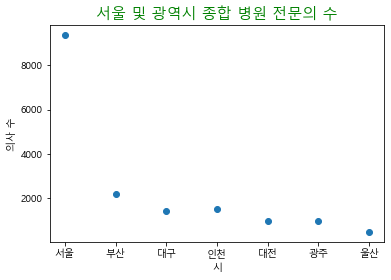

In [66]:
# 서울과 6개 광역시의 종합 병원 전문의 의사 수를 산포 그래프(Scatter Plot)로 보여주는 프로그램을 작성

x = doct['지역']
y = doct['전문의 수']
plt.xlabel('시')
plt.ylabel('의사 수')
plt.title('서울 및 광역시 종합 병원 전문의 수', color= 'green', fontsize=15)
plt.scatter(x,y)
plt.show()

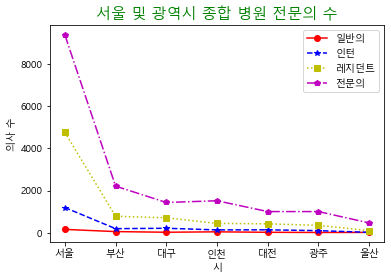

In [65]:
# 4. 종합병원의 일반의,인턴,선그래프로 나타내시오
x= doct['지역']
y1 = doct['일반의 수']
y2 = doct['인턴 수']
y3 = doct['레지던트 수']
y4 = doct['전문의 수']

plt.plot(x, y1,'ro-', label='일반의')
plt.plot(x, y2,'b*--', label='인턴')
plt.plot(x, y3,'ys:', label='레지던트')
plt.plot(x, y4,'mp-.', label='전문의')
plt.xlabel('시')
plt.ylabel('의사 수')
plt.title('서울 및 광역시 종합 병원 전문의 수', color= 'green', fontsize=15)
plt.legend()
plt.show()

In [74]:
y1 = doct[doct.지역 == '서울']['일반의 수']
y1

0    162
Name: 일반의 수, dtype: int64

In [79]:
doct.T

,0,1,2,3,4,5,6
지역,서울,부산,대구,인천,대전,광주,울산
일반의 수,162,58,27,47,25,16,19
인턴 수,1196,197,215,138,142,102,23
레지던트 수,4757,785,712,444,425,356,104
전문의 수,9375,2211,1436,1518,1006,1006,467


In [84]:
z = doct.set_index('지역')

In [85]:
z.T

지역,서울,부산,대구,인천,대전,광주,울산
일반의 수,162,58,27,47,25,16,19
인턴 수,1196,197,215,138,142,102,23
레지던트 수,4757,785,712,444,425,356,104
전문의 수,9375,2211,1436,1518,1006,1006,467


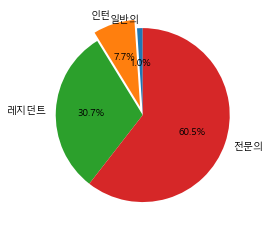

In [97]:
x = z.T['서울']
lab = ['일반의','인턴','레지던트','전문의']
explode = [0, 0.10, 0, 0]
plt.pie(x,labels=lab, autopct= '%.1f%%', startangle=90, explode=explode)
plt.show()